In [1]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
import sys
from importlib import reload
import Saxs2dProfile as s2p
import Saxs1dProfile as s1p
import XafsData as xd
import os

print("python", sys.version_info)
print("numpy", np.__version__)
print("cv2", cv2.__version__) # type: ignore
print("matplotlib", matplotlib.__version__) # type: ignore
print("cwd", os.getcwd())

python sys.version_info(major=3, minor=10, micro=12, releaselevel='final', serial=0)
numpy 1.25.1
cv2 4.8.0
matplotlib 3.7.2
cwd /home/oishi/SpectraSpark


In [2]:
reload(s2p)
reload(s1p)
reload(xd)
print(s2p.__version__)
print(s1p.__version__)
print(xd.__version__)

0.0.25
0.0.7
0.0.1


In [3]:
dafsdata = s1p.DafsData(
    "testdata/s222/Zn69_450C2wk_2/dafs", "../Zn69_450C2wk_dafs2.dat"
)
dafsdata.loadStdinfo("../../AgBeh/stdinfo.csv")

Saxs1dProfile [INFO]: loaded 481 files from /home/oishi/SpectraSpark/testdata/s222/Zn69_450C2wk_2/dafs from Saxs1dProfile.py:73
Saxs1dProfile [INFO]: loaded 481 files from /home/oishi/SpectraSpark/testdata/s222/Zn69_450C2wk_2/dafs from Saxs1dProfile.py:73


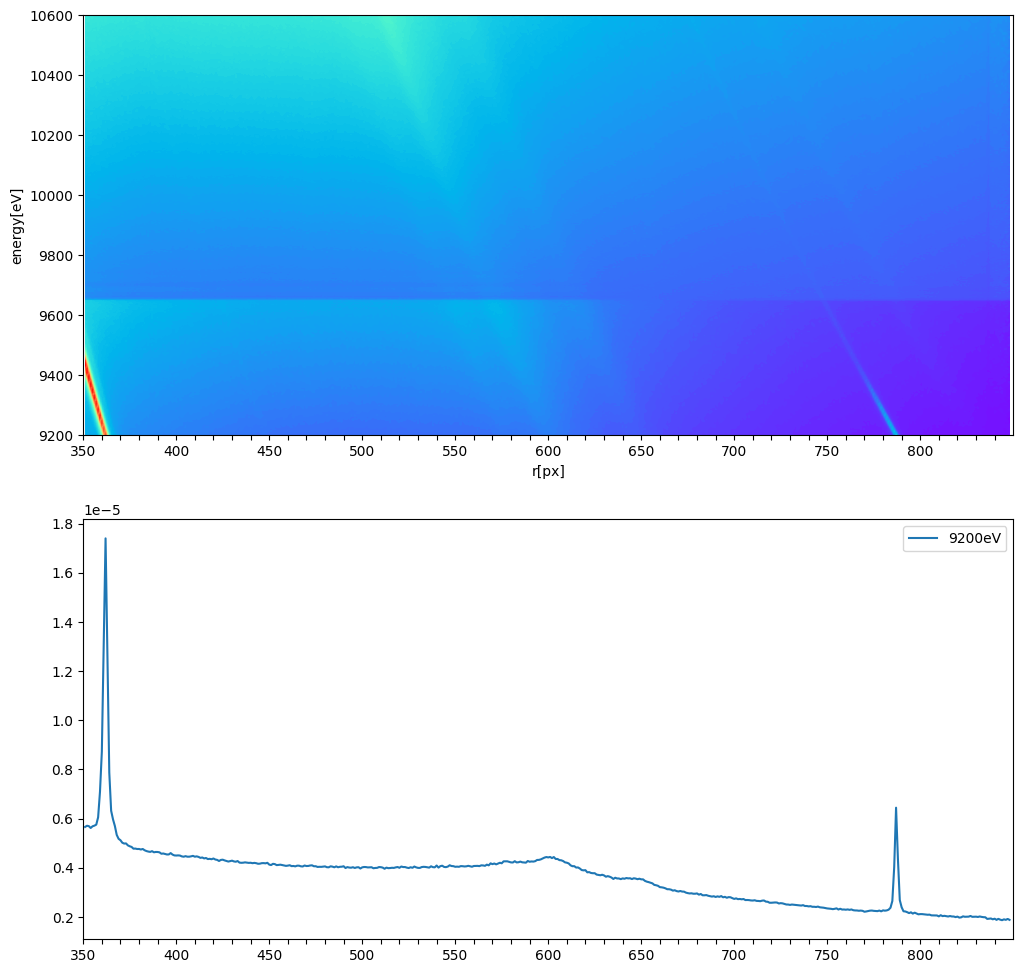

In [11]:
fig, axs = plt.subplots(2,1,figsize=(12,12))
xlim = (350,850)
x_ticks = np.arange(350,850,10)
x_labels = [val if val%50==0 else "" for val in x_ticks]

ax = axs[0]
dafsdata.heatmap(ax, levels=200, show_colorbar=False)
ax.set_xlim(xlim)
ax.set_xticks(x_ticks, x_labels)
ax.set_ylim(9200,10600)

ax = axs[1]
for e in [9200]:
    ax.plot(dafsdata.r,dafsdata.e_slice(e),label=f"{e}eV")

ax.set_xlim(xlim)
ax.set_xticks(x_ticks, x_labels)
ax.legend()

plt.show()

In [12]:
re = np.array([[350,9200],[848,9200],[350,10600],[848,10600]])
print(dafsdata.r2q(re[:,0],re[:,1]))
r = np.array([362,600,788])
print(dafsdata.r2q(r,np.full_like(r,9200)))

[3.84540239 8.61892163 4.45579353 9.88777634]
[3.96042695 6.24174739 8.04379883]


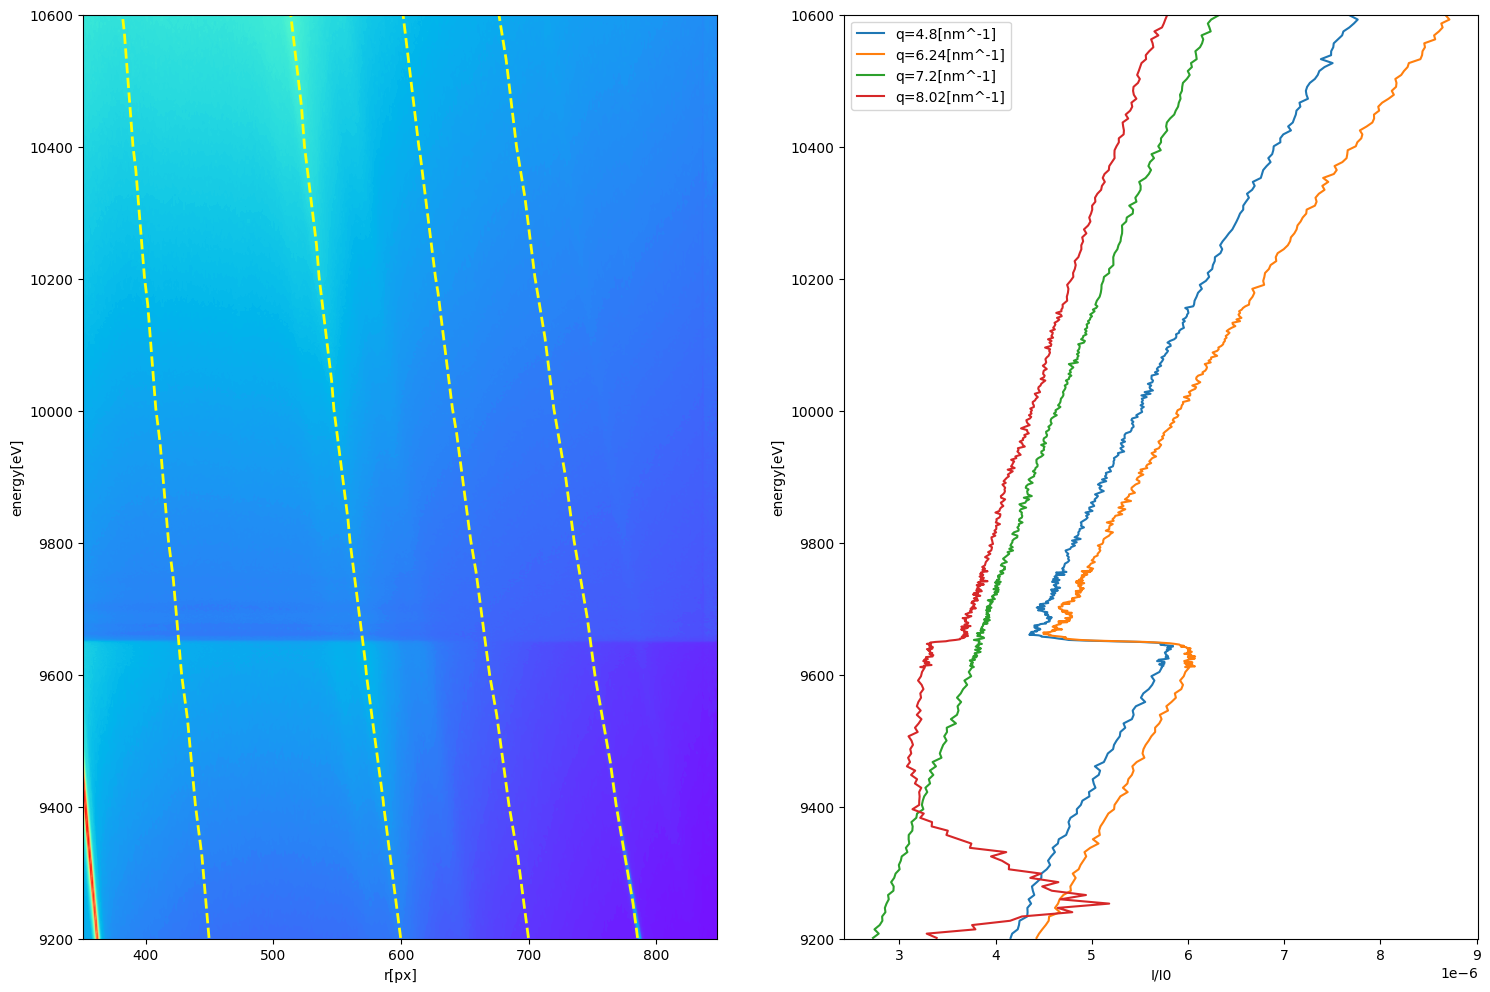

In [18]:
# 4.8: 5layer(10H)に対応するq
q = np.array([4.8, 6.24, 7.2, 8.02])

fig, axs = plt.subplots(1, 2, figsize=(18, 12))
ax = axs[0]
ax = dafsdata.heatmap(ax, uselog=False, levels=250)
for qi in q:
    _q = np.full_like(dafsdata.energy, qi)
    _r = dafsdata.q2r(_q, dafsdata.energy)
    ax.plot(_r,dafsdata.energy, label=f"q={q[0]}[nm^-1]", color="yellow", linewidth=2, linestyle="dashed")

ax = axs[1]
out = np.empty((dafsdata.energy.size, q.size+1))
out[:,0] = dafsdata.energy
for i,qi in enumerate(q):
    out[:,i+1] = dafsdata.q_slice(q=qi)
    ax.plot(out[:,i+1],dafsdata.energy, label=f"q={qi}[nm^-1]")
    
out = out[~np.isnan(out).any(axis=1)]
np.savetxt('dafs.dat',out,delimiter=' ',header='# energy[eV] q=4.8[nm^-1] q=6.24[nm^-1] q=7.2[nm^-1] q=8.02[nm^-1]')

ax.set_ylabel("energy[eV]")
ax.set_xlabel("I/I0")
ax.legend()

for ax in axs:
    ax.set_ylim(9200,10600)
plt.show()

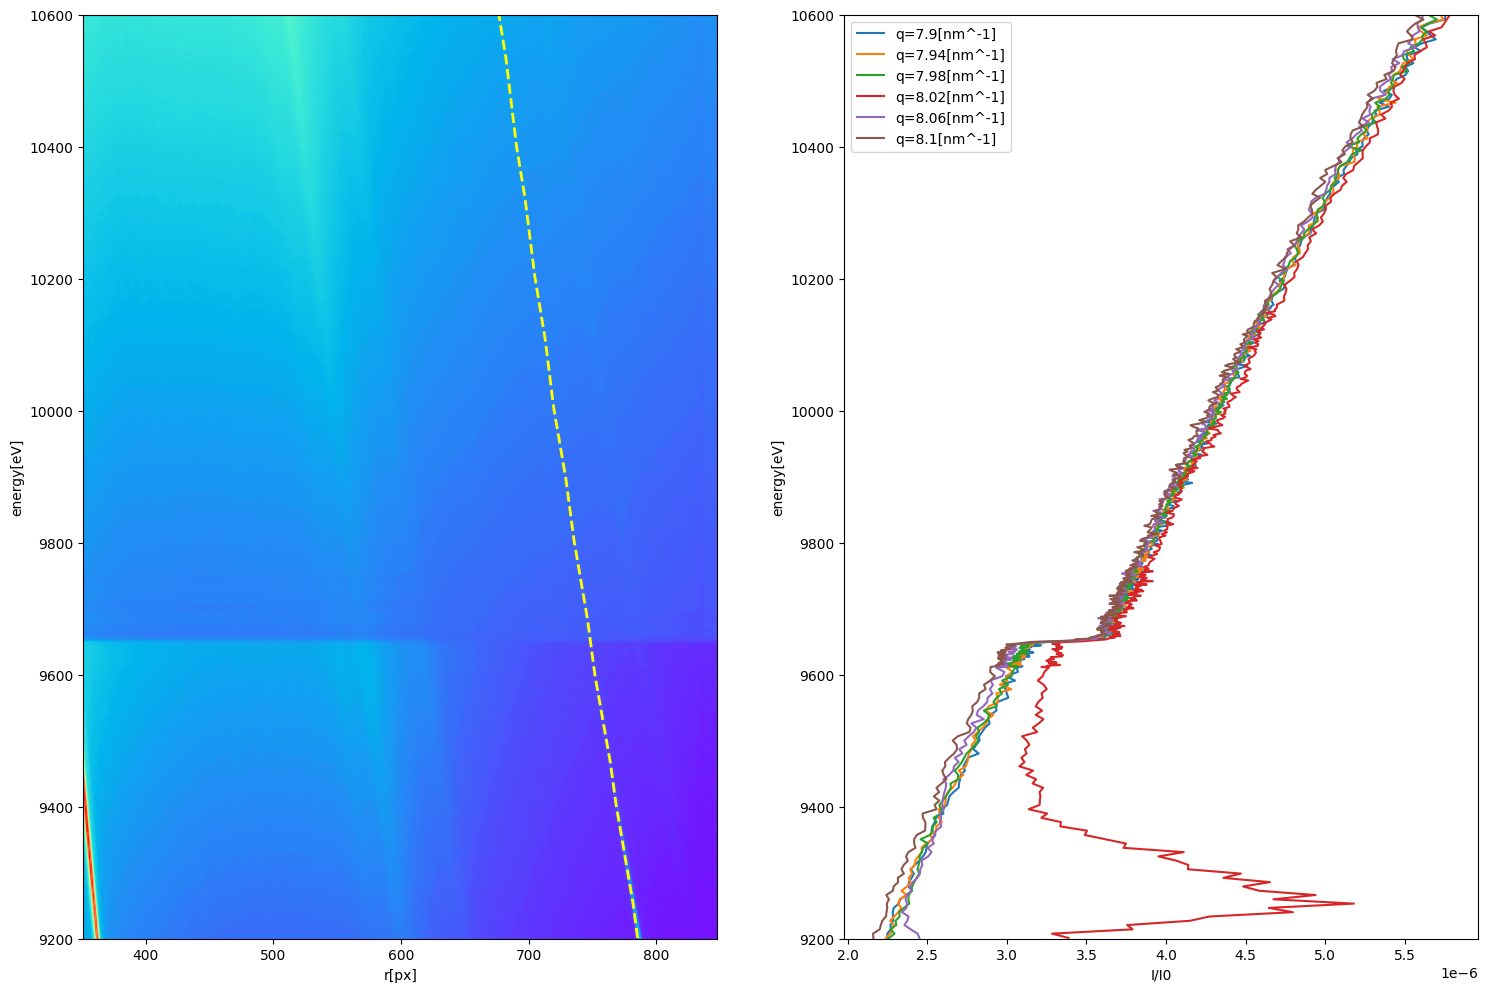

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(18, 12))
ax = axs[0]
ax = dafsdata.heatmap(ax, uselog=False, levels=250)
q = np.full_like(dafsdata.energy, 8.02)
r = dafsdata.q2r(q, dafsdata.energy)
ax.plot(r,dafsdata.energy, label=f"q={q[0]}[nm^-1]", color="yellow", linewidth=2, linestyle="dashed")

ax = axs[1]
for q in np.linspace(7.9,8.1,6):
    i = dafsdata.q_slice(q=q)
    e = dafsdata.energy
    ax.plot(i,e, label=f"q={q}[nm^-1]")
ax.set_ylabel("energy[eV]")
ax.set_xlabel("I/I0")
ax.legend()

for ax in axs:
    ax.set_ylim(9200,10600)
plt.show()

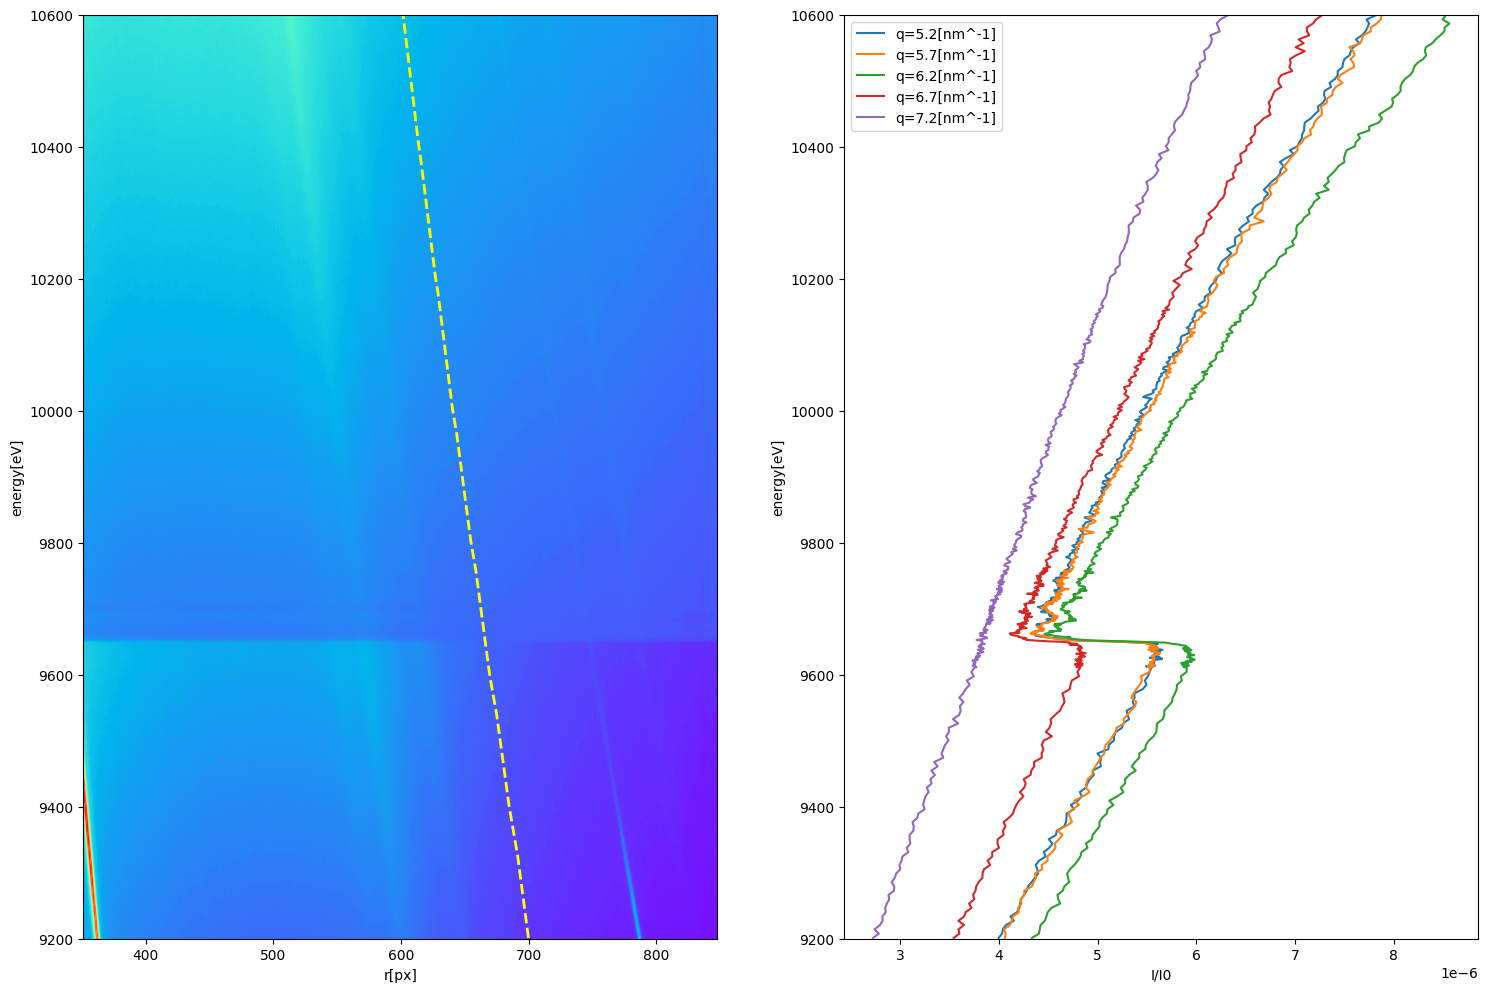

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(18, 12))
ax = axs[0]
ax = dafsdata.heatmap(ax, uselog=False, levels=250)
q = np.full_like(dafsdata.energy, 7.2)
r = dafsdata.q2r(q, dafsdata.energy)
ax.plot(r,dafsdata.energy, label=f"q={q[0]}[nm^-1]", color="yellow", linewidth=2, linestyle="dashed")

ax = axs[1]
for q in np.linspace(5.2,7.2,5):
    i = dafsdata.q_slice(q=q)
    e = dafsdata.energy
    ax.plot(i,e, label=f"q={q}[nm^-1]")
ax.set_ylabel("energy[eV]")
ax.set_xlabel("I/I0")
ax.legend()

for ax in axs:
    ax.set_ylim(9200,10600)
plt.show()